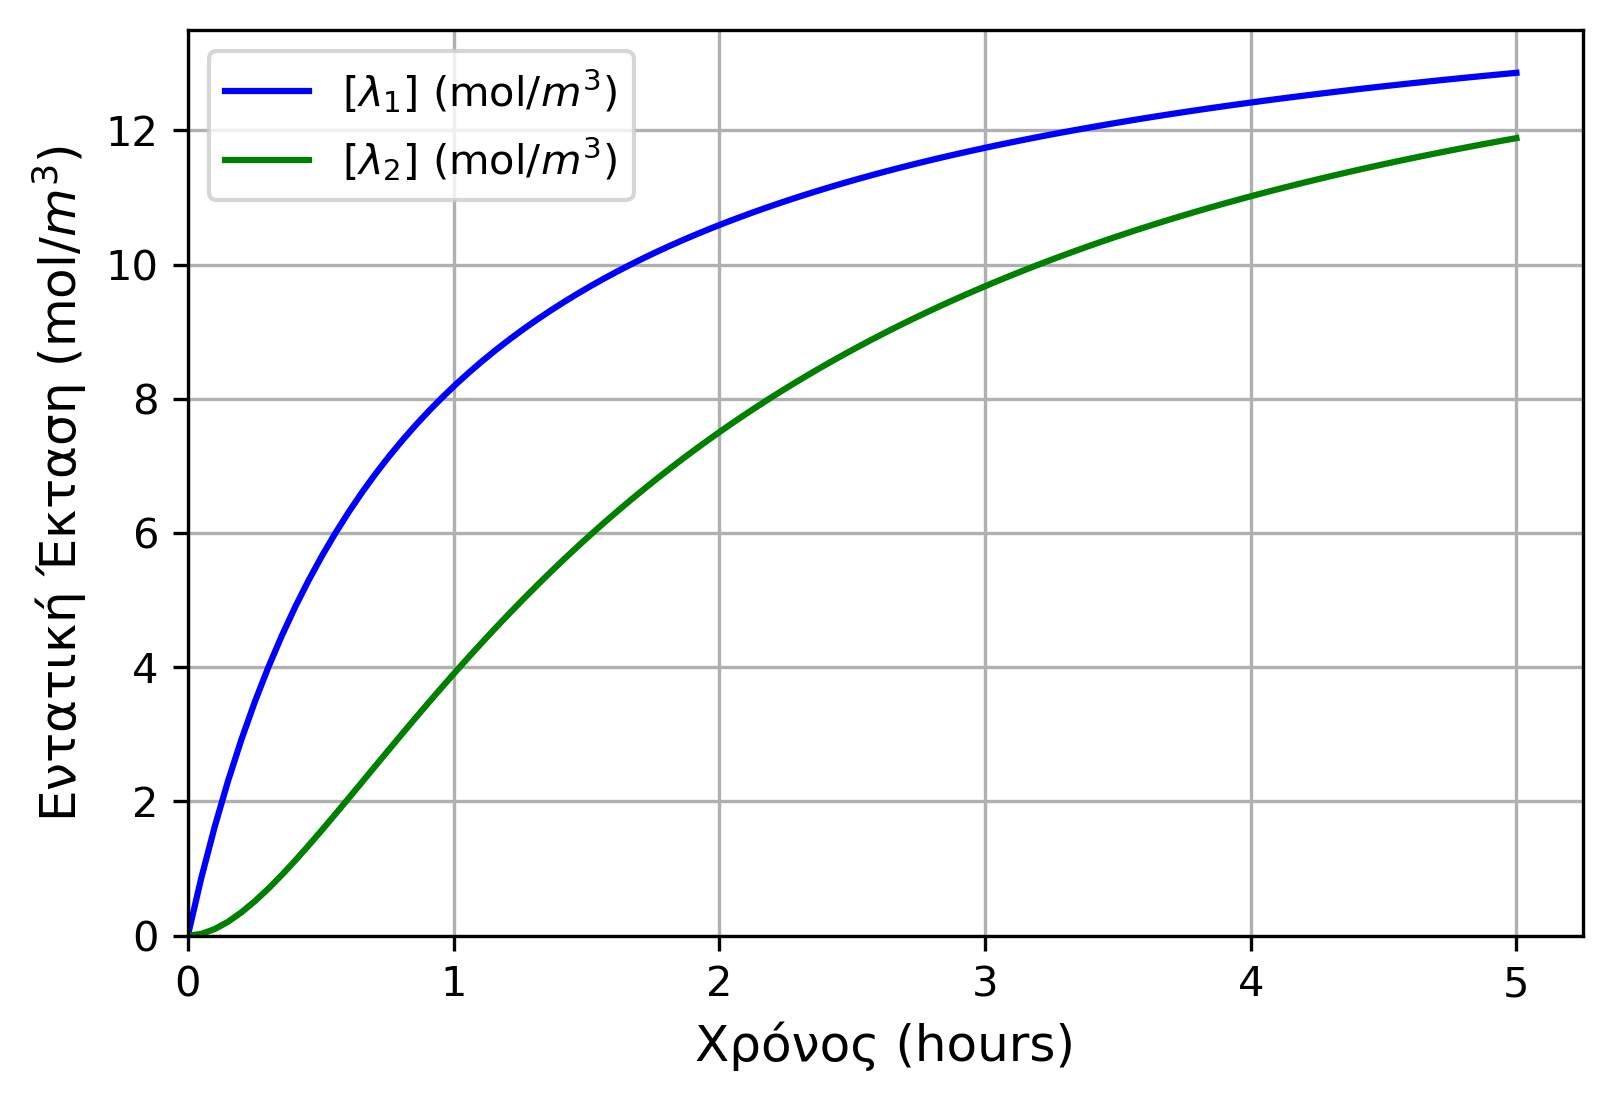

In [3]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def SXA_I_Example_5p8b(t, x):
    # Model Parameters
    k1 = 0.02  # reaction constant (m^3*mol^-1*h^-1)
    k2 = 0.04  # reaction constant (m^3*mol^-1*h^-1)

    # Rate Equations
    R1 = k1 * (30 - 2 * x[0])**2
    R2 = k2 * (0 + x[0] - x[1]) * (30 - x[1])

    # Differential Equations
    dx = np.zeros(2)
    dx[0] = R1          # d[λ1]/dt
    dx[1] = R2          # d[λ2]/dt

    return dx

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 5)  # time span in hours
t_eval = np.linspace(0, 5, 100)  # time points for evaluation

# Initial concentrations: [A0, B0, C0, P0]
initial_conditions = [0.0, 0.0]  # Initial values for [λ1] and [λ2]

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_5p8b, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
λ1 = sol.y[0, :]
λ2 = sol.y[1, :]
time = sol.t

# Plot the results
plt.figure(dpi=300)
plt.plot(time, λ1, label='[$λ_1$] (mol/$m^3$)', color='blue')
plt.plot(time, λ2, label='[$λ_2$] (mol/$m^3$)', color='green')

# Ensure plot starts at origin
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0

plt.xlabel('Χρόνος (hours)', fontsize=12)
plt.ylabel('Εντατική Έκταση (mol/$m^3$)', fontsize=12)
#plt.title('Concentration Profiles of Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
